In [2]:
import numpy as np
import pandas as pd

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [290]:
df = pd.read_csv("all-data.csv",encoding='ISO-8859-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
df1 = pd.read_csv("all-data.csv",encoding='ISO-8859-1',names = ['target','text'])

In [292]:
df1.head()

,target,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [230]:
from sklearn import preprocessing 

In [231]:
label_encoder = preprocessing.LabelEncoder() 

In [233]:
df1['target']= label_encoder.fit_transform(df1['target']) 
df1['target'].head()


0    1
1    1
2    0
3    2
4    2
Name: target, dtype: int64

In [234]:
 df1['text']= label_encoder.fit_transform(df1['text']) 
df1['text'].head()


0     245
1    2937
2    3722
3    4576
4     292
Name: text, dtype: int32

In [235]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [236]:
df1['target'].unique() 

array([1, 0, 2], dtype=int64)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
neutral                                                                                                                            4845 non-null object
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    4845 non-null object
dtypes: object(2)
memory usage: 75.8+ KB


In [238]:
df1.describe()

,target,text
count,4846.000000,4846.000000
mean,1.156624,2419.218118
std,0.617616,1396.370733
min,0.000000,0.000000
25%,1.000000,1210.250000
50%,1.000000,2421.500000
75%,2.000000,3627.750000
max,2.000000,4837.000000


In [239]:
label_encoder.fit(df1['target'])

LabelEncoder()

In [240]:
list(label_encoder.classes_)

[0, 1, 2]

In [241]:
label_encoder.transform(df1['target'])

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [242]:
list(label_encoder.inverse_transform([1,0]))

[1, 0]

In [243]:
encode=LabelEncoder()

In [244]:
df1["target"]=encode.fit_transform(df1["target"])

In [245]:
df1.columns

Index(['target', 'text'], dtype='object')

In [246]:
#Shape of dataframe
df1.shape

(4846, 2)

In [247]:
#Check for missing values
df1.isnull().sum()

target    0
text      0
dtype: int64

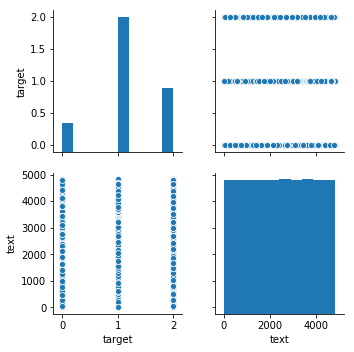

In [248]:
#Visualizing the dataset
import seaborn as sns
sns.pairplot(df1)
plt.show()

In [249]:
cor_data = df1.corr()
cor_data.shape

(2, 2)

In [250]:
#Spliting target variable and independent variables
X = df1.drop(['target'], axis = 1)
y = df1['target']

In [251]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [252]:
#Training the Random Forest Regressor model using sklearn
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()
reg_model.fit(X_train,y_train)

C:\logs\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [253]:
df1['target'].value_counts()

1    2879
2    1363
0     604
Name: target, dtype: int64

In [254]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]
x

,neutral
0,neutral
1,negative
2,positive
3,positive
4,positive
5,positive
6,positive
7,positive
8,positive
9,positive


In [255]:
y

0       Technopolis plans to develop in stages an area...
1       The international electronic industry company ...
2       With the new production plant the company woul...
3       According to the company 's updated strategy f...
4       FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5       For the last quarter of 2010 , Componenta 's n...
6       In the third quarter of 2010 , net sales incre...
7       Operating profit rose to EUR 13.1 mn from EUR ...
8       Operating profit totalled EUR 21.1 mn , up fro...
9       TeliaSonera TLSN said the offer is in line wit...
10      STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...
11      A purchase agreement for 7,200 tons of gasolin...
12      Finnish Talentum reports its operating profit ...
13      Clothing retail chain Sepp+Æl+Æ 's sales incre...
14      Consolidated net sales increased 16 % to reach...
15      Foundries division reports its sales increased...
16      HELSINKI ( AFX ) - Shares closed higher , led ...
17      Incap 

In [256]:
type(x)

pandas.core.frame.DataFrame

In [257]:
x=df.iloc[:,0:1].values
y=df.iloc[:,-1].values
x

array([['neutral'],
       ['negative'],
       ['positive'],
       ...,
       ['negative'],
       ['negative'],
       ['negative']], dtype=object)

In [258]:
type(x)
type(y)

numpy.ndarray

In [259]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y=lb.fit_transform(y)#in last column having species 3 value.1st is satosa,2nd species is versicloor,3rd is varginica.
y#1st column is create is for satosa 2nd column in result is for Varsicolor and last column create  is verginica.means categorical value convert into binary value(0 and 1 format)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [260]:
x_train[:2,:]

array([['neutral'],
       ['neutral']], dtype=object)

In [76]:
x_train

array([[1],
       [1],
       [1],
       ...,
       [2],
       [1],
       [1]], dtype=int64)

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
clas=RandomForestClassifier(n_estimators=50)

reg_model = RandomForestRegressor()
reg_model.fit(X_train,y_train)

C:\logs\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [263]:
clas.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [269]:
y_pred=clas.predict(X_test)
y_pred

array([2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2,

In [271]:
plt.figure(figsize=(100,100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

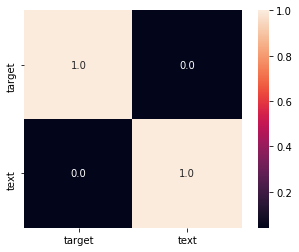

In [272]:
sns.heatmap(cor_data, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10})

In [275]:
#Prediction on training data using the regression model we trained
y__train_pred= reg_model.predict(X_train)
y__train_pred

array([1. , 1.8, 1.3, ..., 1. , 1. , 1. ])

In [293]:
x_train,x_test,y_train,y_test = train_test_split(df1['text'], df1.target, test_size=0.1, random_state = 212)

pipe = Pipeline([('tfidf', TfidfVectorizer()),('model', LinearSVC())])

model = pipe.fit(x_train, y_train)

In [294]:
prediction = model.predict(x_test)

print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy score: 76.29%
